Prepared by

*Asif Newaz*

*Lecturer, EEE, IUT*

**This notebook covers how to use different callbacks when building CNN architecture**

Refer to the 1st notebook to understand how to create CNN architectures - https://github.com/newaz-aa/CNN/blob/main/01.%20Creating%20CNN_architecture.ipynb

# CNN model without callback

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [5]:
X_train = X_train / 255
X_test = X_test / 255

In [7]:
model_v5 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding= 'same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding= 'same',  activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [8]:
model_v5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                        

In [9]:
model_v5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [10]:
history_v5 = model_v5.fit(X_train,y_train, epochs=50, batch_size= 128, validation_data=(X_test,y_test))

Epoch 1/50
391/391 [==============================] - 17s 22ms/step - loss: 1.3610 - accuracy: 0.5197 - val_loss: 3.0537 - val_accuracy: 0.2418
Epoch 2/50
391/391 [==============================] - 7s 17ms/step - loss: 0.9391 - accuracy: 0.6711 - val_loss: 1.2991 - val_accuracy: 0.5720
Epoch 3/50
391/391 [==============================] - 7s 19ms/step - loss: 0.7918 - accuracy: 0.7255 - val_loss: 1.0032 - val_accuracy: 0.6683
Epoch 4/50
391/391 [==============================] - 7s 18ms/step - loss: 0.6981 - accuracy: 0.7555 - val_loss: 0.7335 - val_accuracy: 0.7525
Epoch 5/50
391/391 [==============================] - 7s 18ms/step - loss: 0.6320 - accuracy: 0.7816 - val_loss: 0.9072 - val_accuracy: 0.6934
Epoch 6/50
391/391 [==============================] - 8s 20ms/step - loss: 0.5766 - accuracy: 0.7993 - val_loss: 0.8615 - val_accuracy: 0.7085
Epoch 7/50
391/391 [==============================] - 7s 18ms/step - loss: 0.5392 - accuracy: 0.8125 - val_loss: 0.6889 - val_accuracy: 0.764

In [11]:
df_v5 = pd.DataFrame(history_v5.history)
df_v5.tail()

,loss,accuracy,val_loss,val_accuracy
45,0.114223,0.95892,0.844929,0.7990
46,0.120170,0.95738,0.741110,0.8220
47,0.115752,0.95896,0.740429,0.8237
48,0.113939,0.95960,0.770361,0.8247
49,0.112380,0.95972,0.693697,0.8267


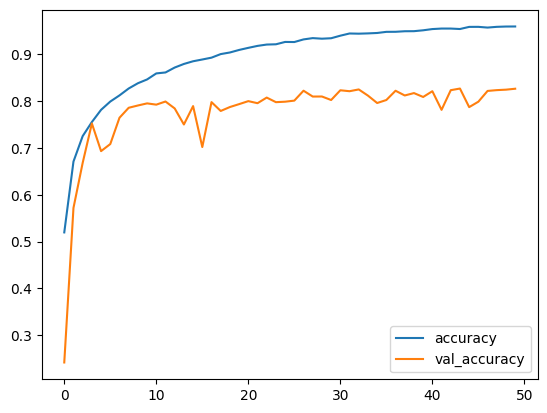

In [12]:
df_v5[["accuracy","val_accuracy"]].plot();

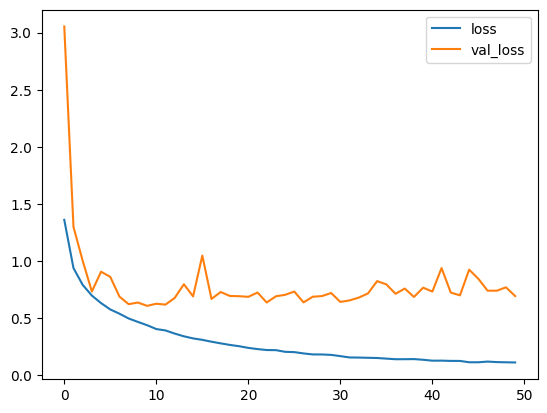

In [17]:
df_v5[["loss","val_loss"]].plot();

# CNN model with Callback

There are different callbacks available in the TensorFlow library. We are interested in early_stopping callback to stop training if the model stops improving. This will reduce overfitting of the model.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [13]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

This will check validation loss after each epoch and for consecutive 5 epochs, if the val_loss dont decrease, the model will stop training.

In [14]:
# same as v5
model_v6 = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding= 'same', activation="relu",input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(32, (3,3), padding= 'same',  activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=1),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Conv2D(128, (3,3), padding= 'same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), padding= 'same',  strides=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [15]:
model_v6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [16]:
history_v6 = model_v6.fit(X_train,y_train,
                          epochs=50,
                          batch_size= 128,
                          validation_data=(X_test,y_test),
                          callbacks=early_stop)

Epoch 1/50
391/391 [==============================] - 12s 22ms/step - loss: 1.3408 - accuracy: 0.5276 - val_loss: 3.7509 - val_accuracy: 0.1874
Epoch 2/50
391/391 [==============================] - 8s 20ms/step - loss: 0.9430 - accuracy: 0.6680 - val_loss: 1.3566 - val_accuracy: 0.5549
Epoch 3/50
391/391 [==============================] - 8s 20ms/step - loss: 0.8007 - accuracy: 0.7193 - val_loss: 1.2128 - val_accuracy: 0.6051
Epoch 4/50
391/391 [==============================] - 7s 19ms/step - loss: 0.7084 - accuracy: 0.7554 - val_loss: 0.7886 - val_accuracy: 0.7249
Epoch 5/50
391/391 [==============================] - 8s 21ms/step - loss: 0.6414 - accuracy: 0.7739 - val_loss: 0.7166 - val_accuracy: 0.7522
Epoch 6/50
391/391 [==============================] - 7s 19ms/step - loss: 0.5828 - accuracy: 0.7962 - val_loss: 0.8068 - val_accuracy: 0.7282
Epoch 7/50
391/391 [==============================] - 7s 18ms/step - loss: 0.5423 - accuracy: 0.8115 - val_loss: 0.6983 - val_accuracy: 0.763

In [18]:
df_v6 = pd.DataFrame(history_v6.history)
df_v6.tail()

,loss,accuracy,val_loss,val_accuracy
12,0.363390,0.87216,0.943983,0.7327
13,0.348856,0.87692,0.705979,0.7794
14,0.324779,0.88412,0.708354,0.7843
15,0.308546,0.89144,0.865091,0.7486
16,0.293686,0.89594,0.751606,0.7894


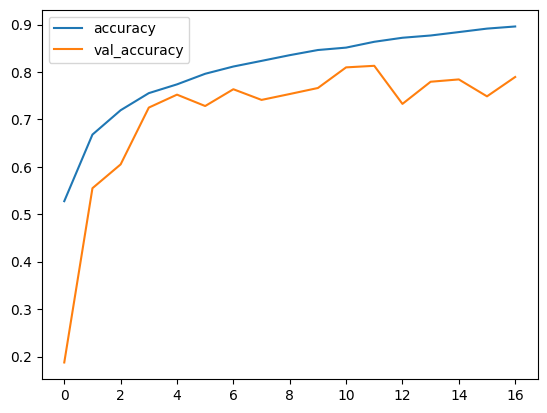

In [19]:
df_v6[["accuracy","val_accuracy"]].plot();

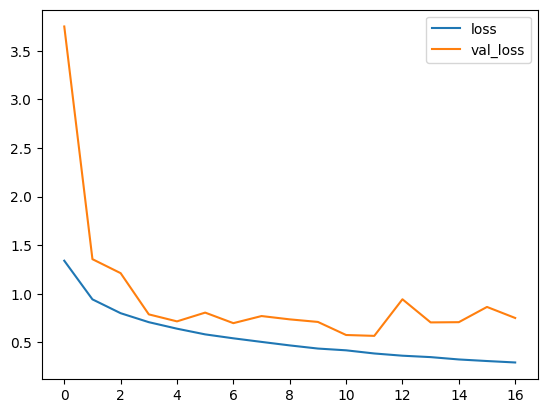

In [20]:
df_v6[["loss","val_loss"]].plot();

As you can see, the model stops training after 17 epochs as the validation accuracy do not change much (can be controlled by the 'min_delta' parameter inside Early_stopping callback).

This approach reduces overfitting as can be compared with the previous model's (v5) output.

Check out other callbacks and try them by yourself -


*   TensorBoard
*   ReduceLRonPlateau
* ModelCheckpoint

